In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

from dataset import create_detection_dataset

ModuleNotFoundError: No module named 'torch'

In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

from dataset import create_detection_dataset


dataset_file = '/mnt/sasa028/cvnn4sar/SARFish/SNAP_data/detection_dataset/SLC/d_fold/128_16/1/fold_1.json'

train_data = create_detection_dataset(dataset_file, 'complex', drop_low=True, drop_empty=True, partition='train')        
val_data = create_detection_dataset(dataset_file, 'complex', drop_low=True, drop_empty=True, partition='validation')
test_data = create_detection_dataset(dataset_file, 'complex', drop_low=True, drop_empty=True, partition='test')

# Function to collect pixel values from the dataset
def get_pixel_values_from_dataset(dataset):
    pixel_values = []
    for img, _ in dataset:
        pixel_values.extend(torch.abs(img[0]).flatten().detach().cpu().numpy())
    return pixel_values

# Get pixel values from the dataset
pixel_values = []
pixel_values.extend(get_pixel_values_from_dataset(train_data))
pixel_values.extend(get_pixel_values_from_dataset(val_data))
pixel_values.extend(get_pixel_values_from_dataset(test_data))

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/sasa028/cvnn4sar/SARFish/SNAP_data/detection_dataset/SLC/d_fold/128_16/1/fold_1.json'

The 99th percentile of the pixel values is: 0.9986433964967727
The max of the pixel values is: 1.0000001192092896


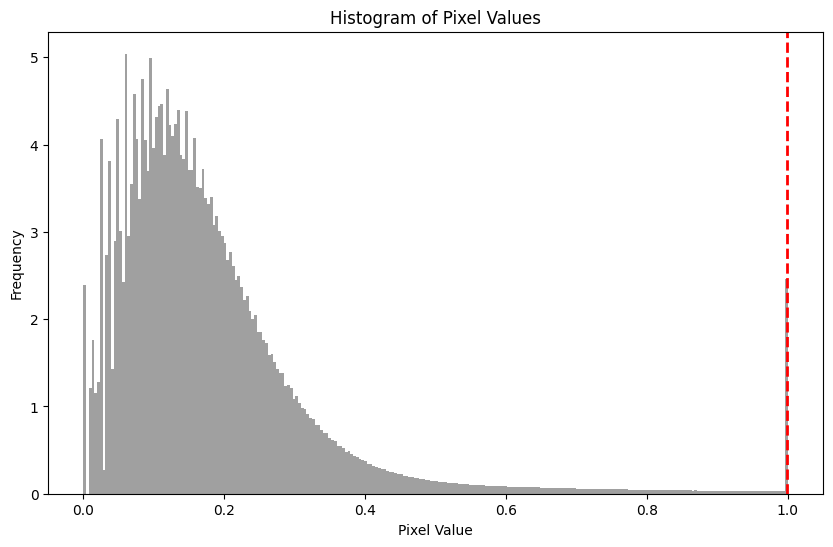

In [2]:
# Plot the histogram
def plot_histogram(pixel_values):
    plt.figure(figsize=(10, 6))
    plt.hist(pixel_values, bins=256, range=(0, 1), density=True, color='gray', alpha=0.75)
    plt.axvline(percentile_99, color='r', linestyle='dashed', linewidth=2, label=f'90th Percentile: {percentile_99:.2f}')
    plt.title('Histogram of Pixel Values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

percentile_99 = np.percentile(pixel_values, 99)
maxp = np.max(pixel_values)
print(f"The 99th percentile of the pixel values is: {percentile_99}")
print(f"The max of the pixel values is: {maxp}")
plot_histogram(pixel_values)

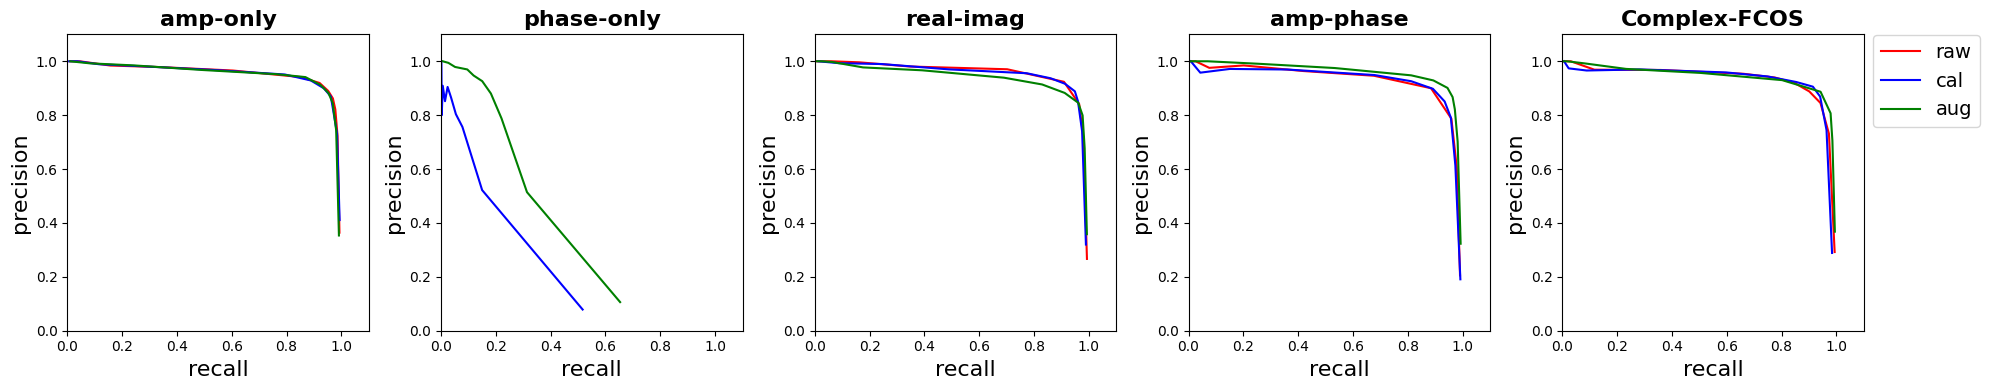

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np


log_path = 'C:/Users/wittej/final_version_cvnn/cvnn4sar/SARFish/CVNN/pipeline/utils/logs_6/detection/'
colors = ['red', 'black', 'blue', 'green']
idx=-1
data_to_label_dict = {"SARFish_data1": 'raw', "SNAP_data1": 'cal', "SNAP_data4": 'aug'}
model_to_model_name = {"amp_only" : "amp-only", "phase_only": "phase-only", "real_imag": "real-imag", "amp_phase": "amp-phase", "complex": "Complex-FCOS"}
fig, axes = plt.subplots(1,5, figsize=(20,4))
# Loop through representations, data qualities, augmentations, and fold numbers
for data_quality in ["SARFish_data", "SNAP_data"]:
    for num_augmentations in ["1", "4"]:
        idx += 1
        for i, representation in enumerate(["amp_only", "phase_only", "real_imag", "amp_phase", "complex"]):
            for fold_number in [2]:
                metrics_file = f'{log_path}{data_quality}/d_fold/fold_{fold_number}/{representation}/resnet18/128_16/{num_augmentations}/0_1.pkl'
                try:
                    with open(metrics_file, 'rb') as file:
                        metrics = pickle.load(file)
                except FileNotFoundError:
                    continue
                
                score_threshold = metrics['score_threshold']
                precision = np.array(metrics['precision'])
                recall = np.array(metrics['recall'])
                f1_score = np.array(metrics['f1_score'])
                combined = list(zip(precision, recall))

                # Exclude (0, 0)
                filtered = list(filter(lambda point: point != (0, 0), combined))

                # Unzip the filtered list back into two lists
                precision, recall = zip(*filtered)
                precision = list(precision)
                recall = list(recall)

                axes[i].plot(recall, precision, label=f'{data_to_label_dict[data_quality + num_augmentations]}' , c=colors[idx])
                axes[i].set_xlim(0, 1.1)
                axes[i].set_ylim(0,1.1)
                axes[i].set_xlabel('recall', fontsize=16)
                axes[i].set_ylabel('precision', fontsize=16)
                axes[i].set_title(model_to_model_name[representation], fontweight='bold', fontsize=16)

axes[4].legend(fontsize=14, bbox_to_anchor=(1,1.03))

plt.savefig('precision_recall.png', dpi=300, bbox_inches='tight')
plt.tight_layout()


In [29]:

def numpy_to_latex_table(numpy_array):
    table_str = "\\begin{table}[ht]\n"
    table_str += "\\centering\n"
    table_str += "\\begin{tabular}{|c|c|c|}\n"
    table_str += "\\hline\n"
    
    # Iterate over rows of the numpy array
    for row in numpy_array:
        row_str = " & ".join([str(val) for val in row])
        row_str += " \\\\ \\hline\n"
        table_str += row_str
    
    table_str += "\\end{tabular}\n"
    table_str += "\\caption{Caption of the table.}\n"  # Replace with your caption
    table_str += "\\label{tab:my_table}\n"  # Replace with your label
    table_str += "\\end{table}\n"
    
    return table_str

table = numpy_to_latex_table(result.T)
print(table)

NameError: name 'result' is not defined

In [2]:
fig, axes = plt.subplots(1,3, figsize=(15,5) )


max_f1_array = np.zeros(5,)
for i, representation in enumerate(["amp_only", "phase_only", "real_imag", "amp_phase", "complex"]):
    for fold_number in [2]:
        metrics_file = f'{log_path}SARFish_data/d_fold/fold_{fold_number}/{representation}/resnet18/128_16/1/0_1.pkl'
        try:
            with open(metrics_file, 'rb') as file:
                metrics = pickle.load(file)
        except FileNotFoundError:
            continue
        
        score_threshold = metrics['score_threshold']
        precision = np.array(metrics['precision'])
        recall = np.array(metrics['recall'])
        f1_score = np.array(metrics['f1_score'])

        combined = list(zip(precision, recall))

        # Exclude (0, 0)
        filtered = list(filter(lambda point: point != (0, 0), combined))

        # Unzip the filtered list back into two lists
        precision, recall = zip(*filtered)
        # Plot precision-recall curve
        axes[0].plot(recall, precision, label=f'{representation}',lw=2, markersize=8)

axes[0].set_xlabel('Recall', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Precision', fontsize=14, fontweight='bold')

for i, representation in enumerate(["amp_only", "phase_only", "real_imag", "amp_phase", "complex"]):
    for fold_number in [2]:
        metrics_file = f'{log_path}SNAP_data/d_fold/fold_{fold_number}/{representation}/resnet18/128_16/1/0_1.pkl'
        try:
            with open(metrics_file, 'rb') as file:
                metrics = pickle.load(file)
        except FileNotFoundError:
            continue
        
        score_threshold = metrics['score_threshold']
        precision = np.array(metrics['precision'])
        recall = np.array(metrics['recall'])
        f1_score = np.array(metrics['f1_score'])
        
        combined = list(zip(precision, recall))

        # Exclude (0, 0)
        filtered = list(filter(lambda point: point != (0, 0), combined))

        # Unzip the filtered list back into two lists
        precision, recall = zip(*filtered)

        # Plot precision-recall curve
        axes[1].plot(recall, precision, label=f'{representation}', lw=2, markersize=8)

axes[1].set_xlabel('Recall', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Precision', fontsize=14, fontweight='bold')

for i, representation in enumerate(["amp_only", "phase_only", "real_imag", "amp_phase", "complex"]):
    for fold_number in [2]:
        metrics_file = f'{log_path}SNAP_data/d_fold/fold_{fold_number}/{representation}/resnet18/128_16/4/0_1.pkl'
        try:
            with open(metrics_file, 'rb') as file:
                metrics = pickle.load(file)
        except FileNotFoundError:
            continue
        
        score_threshold = metrics['score_threshold']
        precision = np.array(metrics['precision'])
        recall = np.array(metrics['recall'])
        f1_score = np.array(metrics['f1_score'])

        combined = list(zip(precision, recall))

        # Exclude (0, 0)
        filtered = list(filter(lambda point: point != (0, 0), combined))

        # Unzip the filtered list back into two lists
        precision, recall = zip(*filtered)
        
        # Plot precision-recall curve
        axes[2].plot(recall, precision, label=f'{representation}', lw=2, markersize=8)

axes[2].set_xlabel('Recall', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Precision', fontsize=14, fontweight='bold')
plt.legend()

NameError: name 'plt' is not defined

6


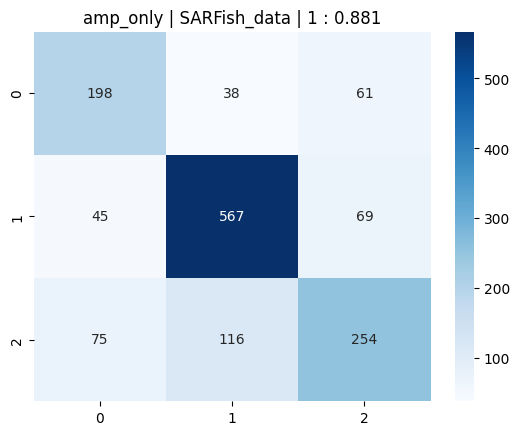

6


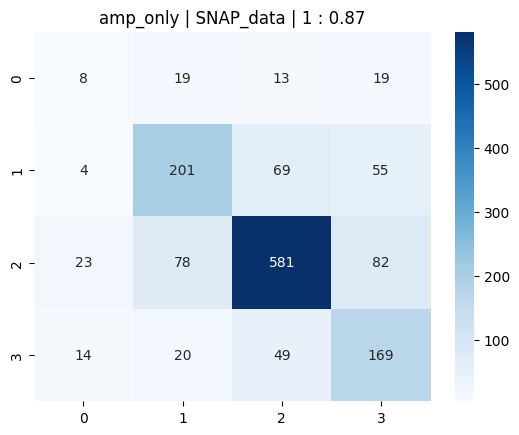

6


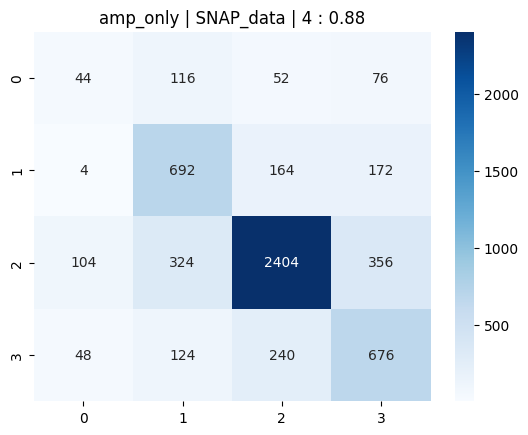

0


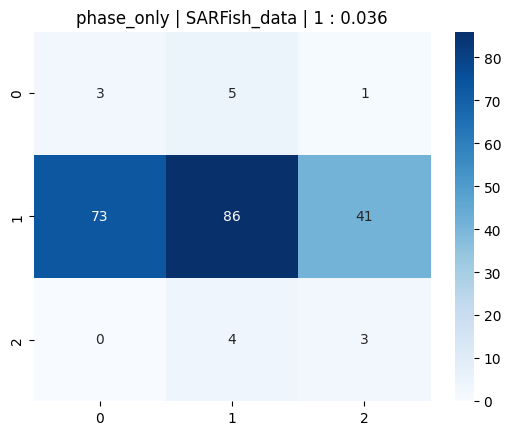

3


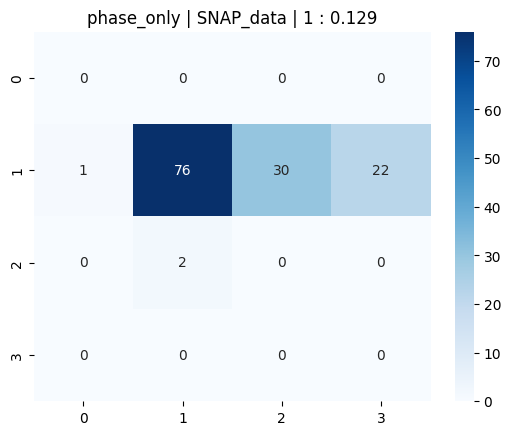

3


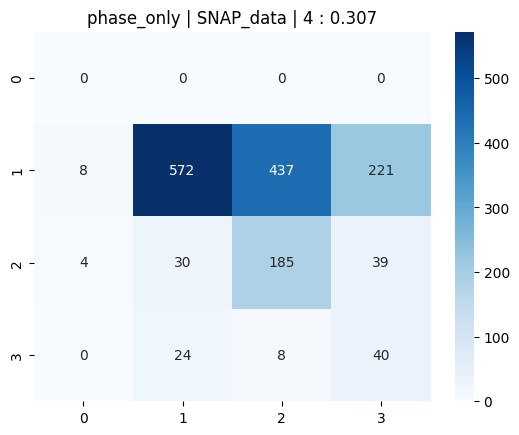

6


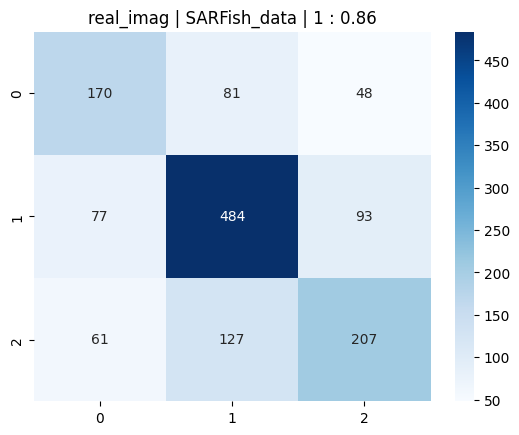

5


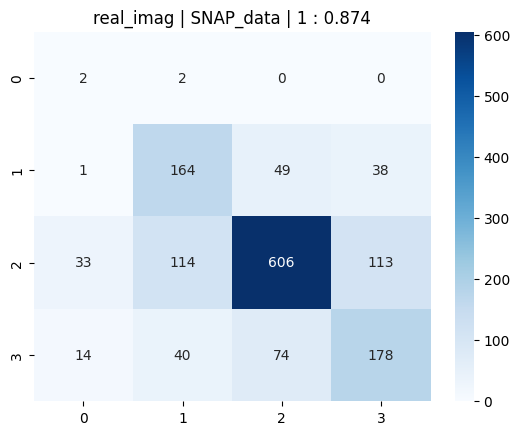

5


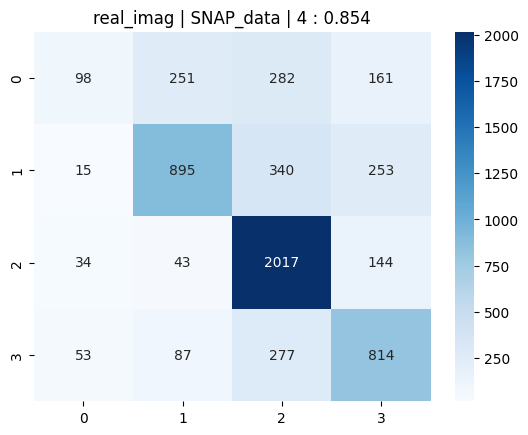

6


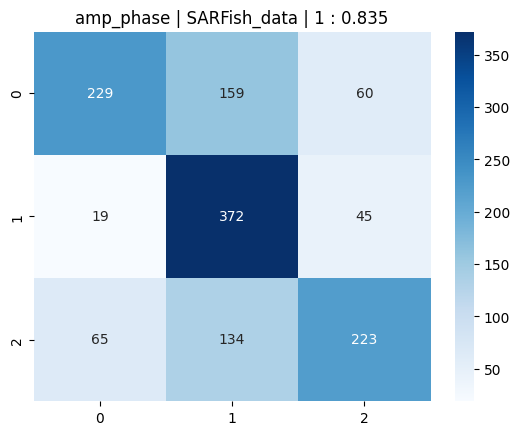

6


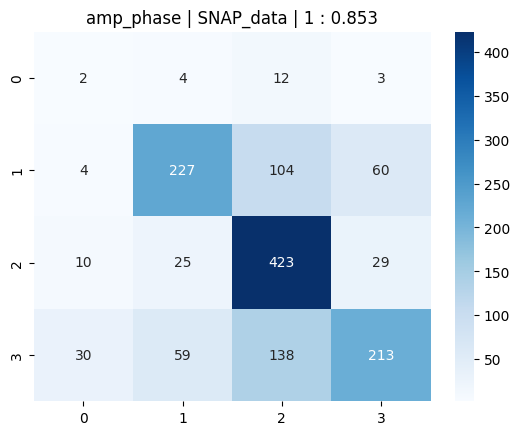

6


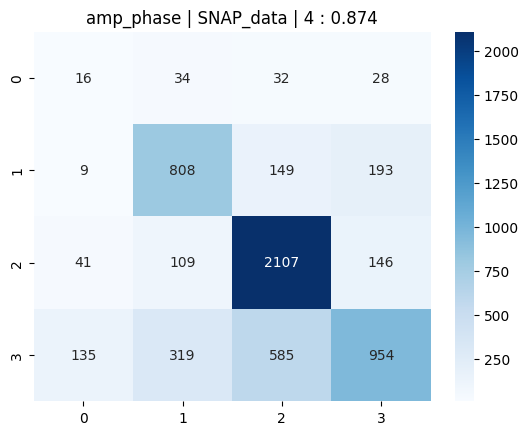

5


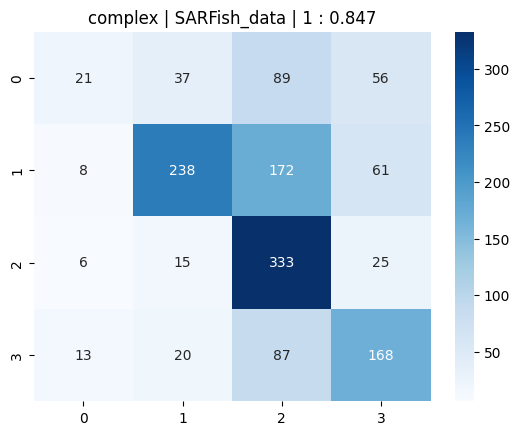

5


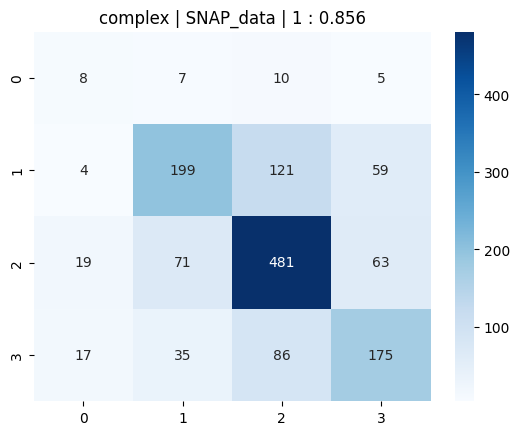

6


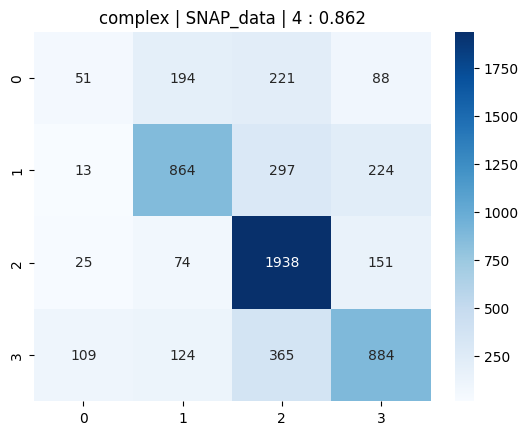

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

log_path = 'C:/Users/wittej/final_version_cvnn/cvnn4sar/SARFish/CVNN/pipeline/utils/logs_6/detection/'

for i, representation in enumerate(["amp_only", "phase_only", "real_imag", "amp_phase", "complex"]):
    for data_quality in ["SARFish_data", "SNAP_data"]:
        for num_augmentations in ["1", "4"]:
            for fold_number in [2]:
                metrics_file = f'{log_path}{data_quality}/d_fold/fold_{fold_number}/{representation}/resnet18/128_16/{num_augmentations}/0_3.pkl'
                try:
                    with open(metrics_file, 'rb') as file:
                        metrics = pickle.load(file)
                except FileNotFoundError:
                    continue
                
                score_threshold = metrics['score_threshold']
                precision = np.array(metrics['precision'])
                recall = np.array(metrics['recall'])
                f1_score = 2 * precision * recall / (precision + recall + 1e-6)
                best_idx= np.argmax(f1_score)
                print(best_idx)
                confusion_matrix = metrics['confusion_matrix'][best_idx]
                sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap='Blues')
                plt.title(f'{representation} | {data_quality} | {num_augmentations} : {round(max(f1_score),3)}')
                plt.show()



In [14]:
# import pandas as pd
# import matplotlib.pyplot as plt
# log_path = '/home/wittej/cvnn4sar/SARFish/CVNN/pipeline/utils/logs/detection/'



# for i, representation in enumerate(["amp_only", "phase_only", "real_imag", "amp_phase", "complex"]):
#     for data_quality in ["SARFish_data", "SNAP_data"]:
#         for num_augmentations in ["1", "4"]:
#             val_log_file = f'{log_path}{data_quality}/d_fold/fold_1/{representation}/resnet18/128_16/{num_augmentations}/val_loss_log.csv'
#             val_loss = pd.read_csv(val_log_file)
#             print(representation, data_quality, num_augmentations)
#             for epoch_id in range(0,10):
#                 val_loss_epoch=val_loss[val_loss['epoch_id'] == epoch_id]
#                 #print(epoch_id,':', np.mean(val_loss_epoch['val_loss']))
#                 #plt.scatter(epoch_id, np.mean(val_loss_epoch['val_loss']))
#             plt.show()
#             print(' ')